In [3]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [4]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!pip show opencv-python


Name: opencv-python
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /home/1c447412-b7da-4146-be62-4eb4a8553ec2/.local/lib/python3.9/site-packages
Requires: numpy, numpy, numpy
Required-by: 


In [6]:
conda install -c conda-forge opencv



CondaValueError: You have chosen a non-default solver backend (libmamba) but it was not recognized. Choose one of: classic


Note: you may need to restart the kernel to use updated packages.


In [7]:
conda activate your_environment_name



CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Note: you may need to restart the kernel to use updated packages.


In [12]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

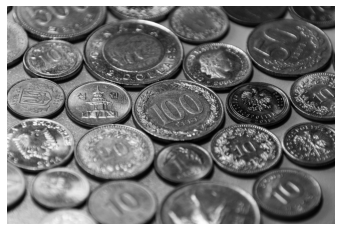

In [40]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('coins-6721441_1280.jpg')  # Make sure the file path is correct

if img is None:
    print ("coins.jpg.")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.imshow(gray, cmap='gray')
    plt.axis('off') 
    plt.show()


In [38]:

img = cv2.imread('coins-6721441_1280.jpg')  # Relative path


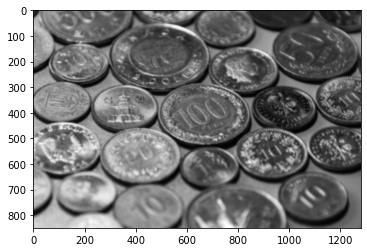

In [44]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)

plt.imshow(blur, cmap='gray')

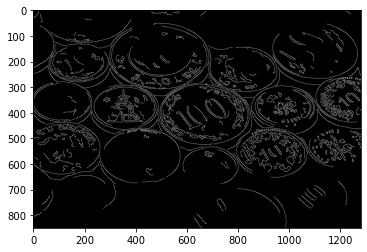

In [51]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

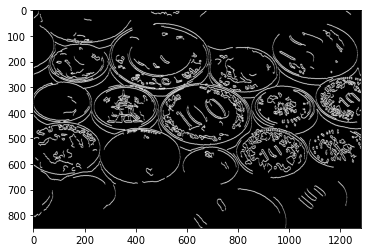

In [55]:
dilated = cv2.dilate(canny, (1,1), iterations=2)
plt.imshow(dilated, cmap='gray')

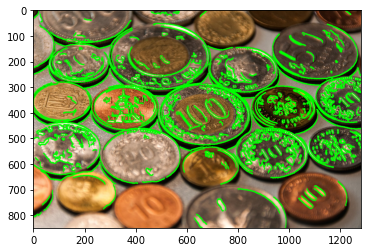

In [62]:
 (cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)


plt.imshow(rgb)

In [66]:
print('coins in the image: ', len(cnt))

coins in the image:  363


Total number of coins detected: 2678


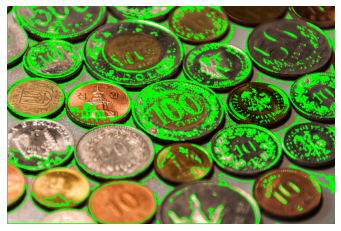

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('coins-6721441_1280.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)


coin_count = len(contours)


print(f"Total number of coins detected: {coin_count}")


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Total number of coins detected: 111


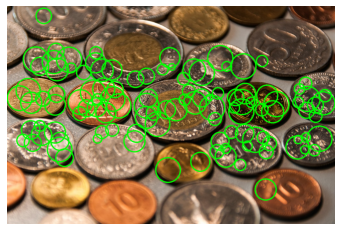

In [73]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('coins-6721441_1280.jpg')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (15, 15), 0)


circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=10, maxRadius=50)


if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 4)


    coin_count = len(circles)

    
    print(f"Total number of coins detected: {coin_count}")


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Total number of coins detected: 0


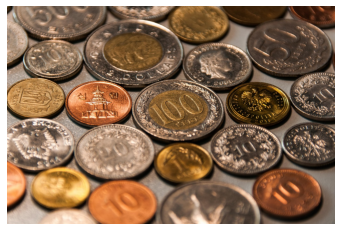

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('coins-6721441_1280.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 200
params.maxArea = 1000

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(gray)
img_with_blobs = cv2.drawKeypoints(img, keypoints, np.array([]), (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


coin_count = len(keypoints)


print(f"Total number of coins detected: {coin_count}")

plt.imshow(cv2.cvtColor(img_with_blobs, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
